# Time Series Plot

Chart yang sumbu X-nya adalah variabel waktu.

## Line Plot

Time Series plot menggunakan Line Plot

In [45]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

### Contoh 1

In [46]:
sns.set(style='darkgrid')

In [47]:
# Load dataset
fmri = sns.load_dataset('fmri')
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


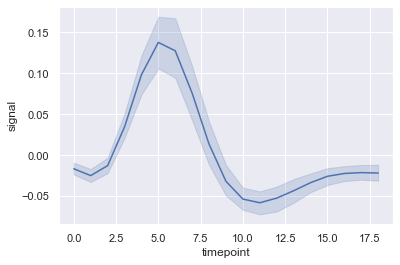

In [48]:
sns.lineplot(x='timepoint', y='signal', data=fmri)

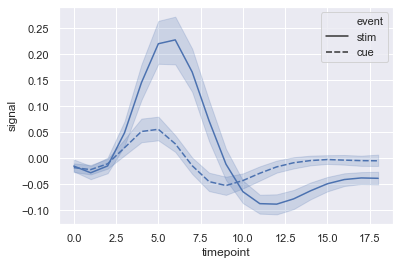

In [49]:
sns.lineplot(x='timepoint', y='signal', style='event', data=fmri)

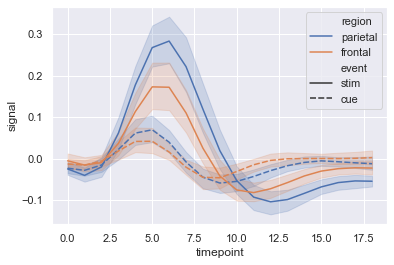

In [50]:
sns.lineplot(x='timepoint', y='signal', hue='region', style='event', data=fmri)

### Contoh 2

In [51]:
rs = np.random.RandomState(365)
values = rs.randn(365, 4).cumsum(axis=0)
print(values)

[[  0.16792113   0.52350518   0.81737553   1.70384552]
 [ -1.97902642   1.23770369   0.05723019   2.74326736]
 [ -2.94547836   1.09402466   1.62835461   2.35998788]
 ...
 [-20.16215347   9.46658006 -10.38886875  17.95576784]
 [-20.32296367   9.63655141  -7.97732518  19.39724181]
 [-20.76771621  11.01141408  -7.94147579  19.35811172]]


In [52]:


dates = pd.date_range('1 1 2016', periods=365, freq='D')
data = pd.DataFrame(values, dates, columns=['A', 'B', 'C', 'D'])
data.head()

,A,B,C,D
2016-01-01,0.167921,0.523505,0.817376,1.703846
2016-01-02,-1.979026,1.237704,0.057230,2.743267
2016-01-03,-2.945478,1.094025,1.628355,2.359988
2016-01-04,-2.307479,0.749367,1.624072,2.518347
2016-01-05,-3.270573,0.333310,1.867085,2.866550


In [53]:
data = data.rolling(7).mean()

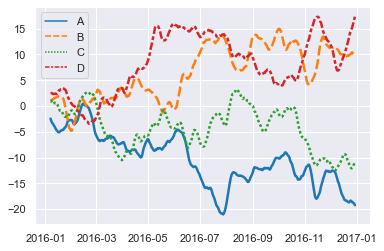

In [54]:
sns.lineplot(data=data, palette='tab10', linewidth=2.5)

### Contoh 3

In [104]:
df = pd.DataFrame({'x': range(1,11), 
                 'y1': np.random.randn(10), 
                 'y2': np.random.randn(10)+range(1,11), 
                 'y3': np.random.randn(10)+range(11,21), 
                 'y4': np.random.randn(10)+range(6,16)
                 })
df.head()

,x,y1,y2,y3,y4
0,1,1.037655,1.761616,9.863186,7.477375
1,2,0.962897,2.169830,12.516061,9.152067
2,3,0.462084,2.621033,12.955640,7.916969
3,4,1.625160,5.058861,13.105058,9.435518
4,5,0.633138,5.192062,15.994600,10.218923


Text(0, 0.5, 'Score')

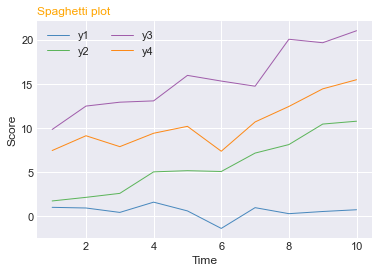

In [107]:
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set1')
 
num = 0
for column in df.drop('x', axis=1):
    num += 1
    plt.plot(df['x'], df[column], marker='', color=palette(num), linewidth=1, alpha=0.9, label=column)

plt.legend(loc=2, ncol=2) 
plt.title('Spaghetti plot', loc='left', fontsize=12, fontweight=0, color='orange')
plt.xlabel('Time')
plt.ylabel('Score')

### Contoh 4

Text(0, 0.5, 'Score')

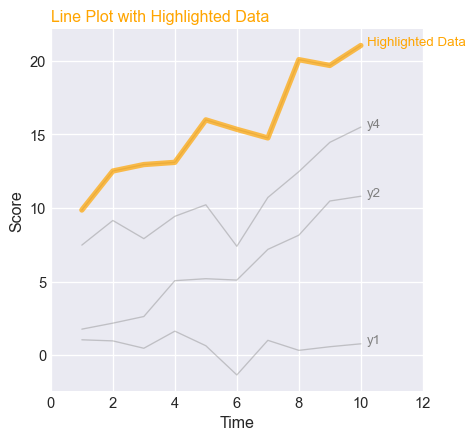

In [112]:
plt.style.use('seaborn-darkgrid')
my_dpi = 96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)

for column in df.drop('x', axis=1):
   plt.plot(df['x'], df[column], marker='', color='grey', linewidth=1, alpha=0.4)

plt.plot(df['x'], df['y3'], marker='', color='orange', linewidth=4, alpha=0.7)

plt.xlim(0,12)
 
num = 0
for i in df.values[9][1:]:
   num += 1
   name = list(df)[num]
   if name != 'y3':
      plt.text(10.2, i, name, horizontalalignment='left', size='small', color='grey')

plt.text(10.2, df['y3'].tail(1), 'Highlighted Data', horizontalalignment='left', size='small', color='orange')
plt.title('Line Plot with Highlighted Data', loc='left', fontsize=12, fontweight=0, color='orange')
plt.xlabel('Time')
plt.ylabel('Score')

### Contoh 5

In [113]:
dots = sns.load_dataset('dots')
dots.head()

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487


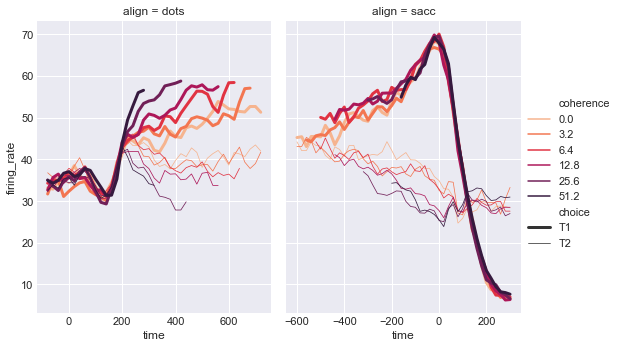

In [114]:
palette = sns.color_palette("rocket_r")
sns.relplot(
    data=dots,
    x='time', y='firing_rate',
    hue='coherence', size='choice', col='align',
    kind='line', size_order=['T1', 'T2'], palette=palette,
    height=5, aspect=.75, facet_kws=dict(sharex=False),
)

### Studi Kasus

In [88]:
import pandas as pd

In [89]:
# url = 'https://raw.githubusercontent.com/cornflake15/data-course/main/datasets/openweatherdata-denpasar-1990-2020.csv'
usecols = ['date', 'temp', 'temp_min', 'temp_max', 'pressure', 'humidity', 'wind_speed', 'wind_deg', 
           'clouds_all', 'weather_main', 'weather_description']
df = pd.read_csv('../datasets/openweatherdata-denpasar-1990-2020.csv', 
                 parse_dates=True, index_col='date', usecols=usecols)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 264924 entries, 1990-01-01 00:00:00 to 2020-01-07 23:00:00
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   temp                 264924 non-null  float64
 1   temp_min             264924 non-null  float64
 2   temp_max             264924 non-null  float64
 3   pressure             264924 non-null  float64
 4   humidity             264924 non-null  int64  
 5   wind_speed           264924 non-null  float64
 6   wind_deg             264924 non-null  int64  
 7   clouds_all           264924 non-null  int64  
 8   weather_main         264924 non-null  object 
 9   weather_description  264924 non-null  object 
dtypes: float64(5), int64(3), object(2)
memory usage: 22.2+ MB


In [90]:
df.head()

,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,clouds_all,weather_main,weather_description
date,,,,,,,,,,
1990-01-01 00:00:00,25.82,25.82,25.82,1010.0,86,1.36,225,98,Rain,light rain
1990-01-01 01:00:00,26.20,26.20,26.20,1011.0,84,2.09,247,91,Rain,light rain
1990-01-01 02:00:00,26.45,26.45,26.45,1011.0,84,2.44,262,94,Rain,light rain
1990-01-01 03:00:00,26.80,26.80,26.80,1011.0,82,2.29,271,94,Rain,light rain
1990-01-01 04:00:00,27.04,27.04,27.04,1010.0,82,1.71,274,76,Clouds,broken clouds


In [94]:
# Function to resampling time series data
def data_resample(data, time):
    """
    data: Dataframe
    time: Resampling frequencies
    """
    if time == 'hourly':
        data = data.resample('H').mean() # hour
    elif time == 'daily':
        data = data.resample('D').mean() # day
    elif time == 'weekly':
        data = data.resample('W').mean() # week
    elif time == 'monthly':
        data = data.resample('M').mean() # month
    elif time == 'quarterly':
        data = data.resample('Q').mean() # quarter
    elif time == 'yearly':
        data = data.resample('A').mean() # year
    
    return data

def line_plot(data, plot_kind, xlabel, title):
    plt.figure(1, figsize=(12, 5))
    sns.lineplot(data=data, palette='tab10', linewidth=2.5)
    plt.xlabel(xlabel)
    plt.title(title)
    plt.show()

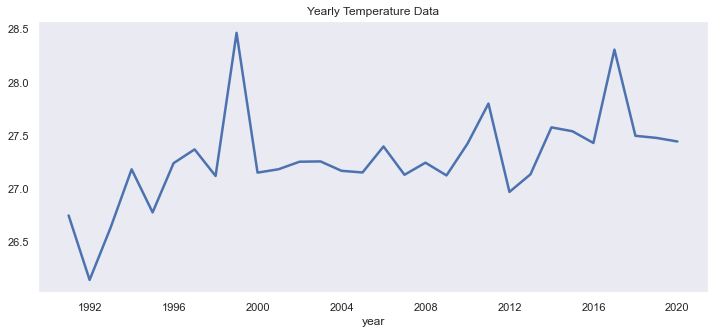

In [95]:
line_plot(data_resample(df.loc['1990':'2019']['temp'], 'yearly'), 'line', 'year', 'Yearly Temperature Data')

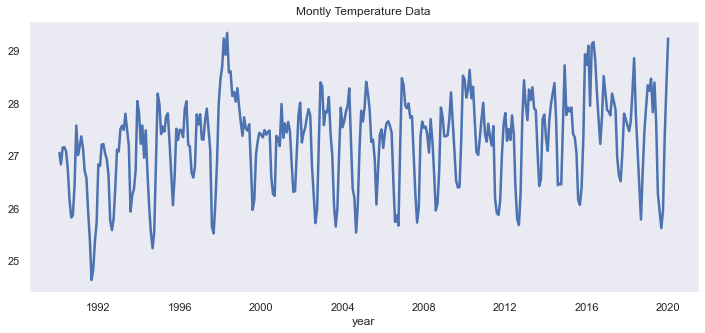

In [96]:
line_plot(data_resample(df.loc['1990':'2019']['temp'], 'monthly'), 'line', 'year', 'Montly Temperature Data')

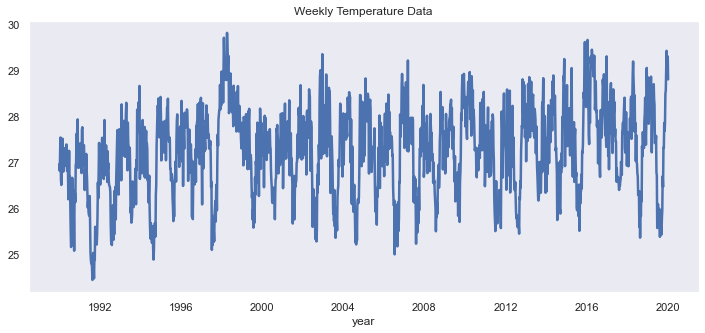

In [97]:
line_plot(data_resample(df.loc['1990':'2019']['temp'], 'weekly'), 'line', 'year', 'Weekly Temperature Data')

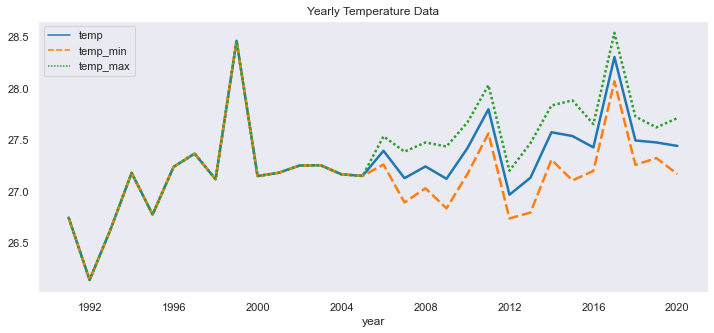

In [98]:
line_plot(data_resample(df[['temp', 'temp_min', 'temp_max']].loc['1990':'2019'], 'yearly'), 'line', 'year', 'Yearly Temperature Data')